### Welcome to the Southern Water Corp Python Case Study!

While working on the Financial unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's data.

Now, Joanna Luez — Southern Water Corp's Lead Scientist — has requested that you convert your earlier analysis in Excel to Python Code. After all, with all the formulas in Excel, it can be tricky for others with less experience in Excel to follow.

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2. 

### Let's get started!

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. You will need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodel.api** - This library will enable you to create statistical models. You will need this library when perfroming regession analysis in Part 2 of this case study.

## Place your code here

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import statsmodels as sm
import numpy as np

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
Unfortunately, the data you've received from Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. You'll need to merge them into a complete dataframe for your analysis. To do this, follow the steps below: 

i. Import each of the three separate files and merge them into one dataframe.  Suggested names: **(dataframe_1, dataframe_2, dataframe_3)**. Don't forget to use the **header** argument to ensure your columns have meaningful names! 

ii. Print descriptive statistics on your combined dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on your combined dataframe. 

In [2]:
dataframe_1 = pd.read_csv('Desalination_Unit_File_001.csv', header=1)
dataframe_2 = pd.read_csv('Desalination_Unit_File_002.csv', header=1)
dataframe_3 = pd.read_csv('Desalination_Unit_File_003.csv', header=1)
data = pd.concat([dataframe_1, dataframe_2, dataframe_3])
print(data.describe())
print(data.info())
data.set_index("TIMEFRAME", inplace = True)

       SURJEK_FLOW_METER_1  SURJEK_FLOW_METER_2  ROTATIONAL_PUMP_RPM  \
count          6998.000000          6998.000000          6998.000000   
mean              5.946164             5.157796             6.607023   
std              20.351494            24.444442            20.843080   
min              -0.527344            -9.118652            -1.000000   
25%               0.000000            -4.766639            -0.687240   
50%               0.313672            -0.351562            -0.013326   
75%               0.704162             0.981540             0.000000   
max             127.221700           313.989300            99.000000   

       SURJEK_PUMP_TORQUE  MAXIMUM_DAILY_PUMP_TORQUE  \
count         6998.000000                6998.000000   
mean            39.091614                 427.295713   
std            124.174236                 473.250507   
min             -2.436085                  -2.278918   
25%             -2.030993                   9.177878   
50%            

---------------------------------------------------------------------------

# Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data. You should now also have a rough sense of the number of entires in each dataset. However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables you created into a boxplot by following these instructions:

i) Create a boxplot from your combined dataframe using **matplotlib and seaborn** with all the variables plotted out. Note: do any particular variables stand out to you? Title your visualization **"Boxplot for all attributes"** and set the boxplot size to 25 x 5.

### Please put your code here


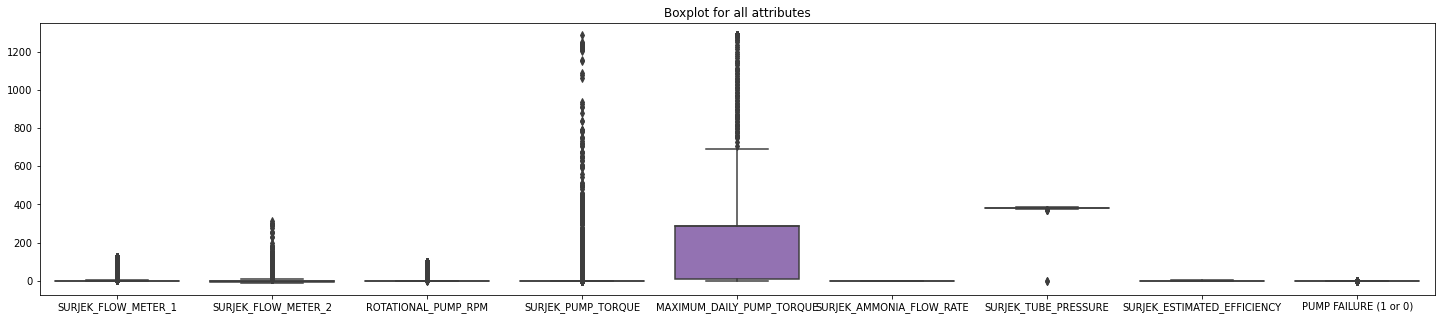

In [3]:
plt.figure(figsize=(25, 5))
sns.boxplot(data=data).set_title('Boxplot for all attributes')
plt.show()

#### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Perhaps, we should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  
i) Create the same boxplot from  <span style="color:green">Step 3</span>, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**. Title this boxplot 'Boxplot without Pump Torque, or Max Daily Pump Torque'.  We have provided the filter list for you.

**Open-ended question:**

Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'?

## Please put your code here

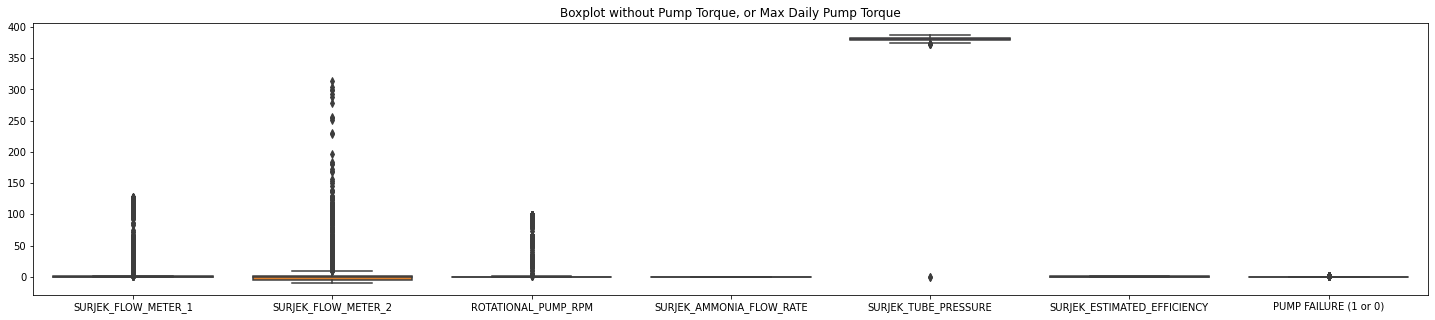

In [4]:
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)'] 
mpl.rcParams['figure.figsize'] = (25,5)
#--write your code below------
filtered=data[filt]
sns.boxplot(data=filtered).set_title('Boxplot without Pump Torque, or Max Daily Pump Torque')
plt.show()

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations). You will be creating two boxplots using the 'PUMP FAILURE (1 or 0)' column in the dataset. We have provided a few lines of code to get you started. Once complete, you should be able to see how much quicker it is to apply filters in Python than it is in Excel. 

Note: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.

**Open-ended Question:**

What variables seem to have the largest variation when the Pump has failed?


## Please put your code here

### From analysing the boxplots, you'll notice that there seem to be a number of outliers.
When you did this work in Excel, you used the interquartile ranges to remove the outliers from each column. Happily, Python allows you to do this same process more quickly and efficiently, as you'll see when working on  <span style="color:green">Step 6</span>.

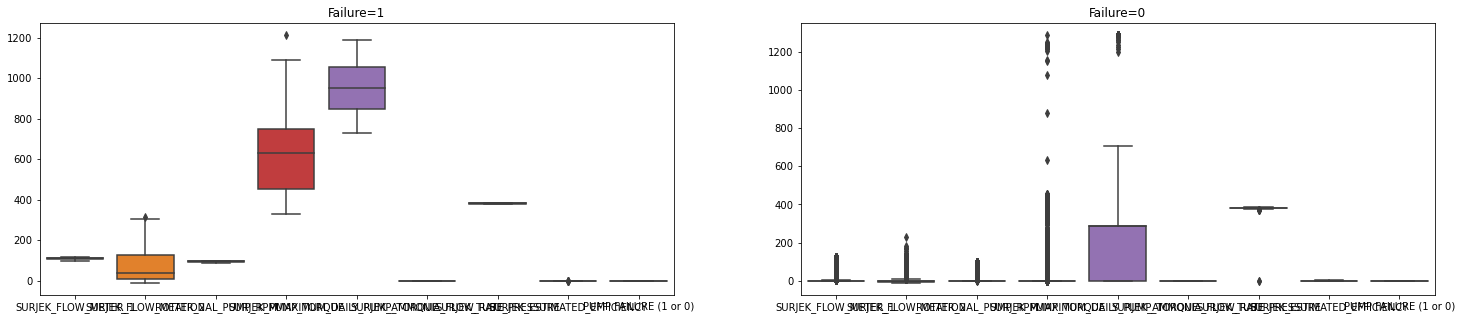

In [5]:
plt.figure(figsize=(25, 5))
plt.subplot(1,2,1)
sns.boxplot(data=data[data['PUMP FAILURE (1 or 0)']==1]).set_title('Failure=1'),
plt.subplot(1,2,2)
sns.boxplot(data=data[data['PUMP FAILURE (1 or 0)']==0]).set_title('Failure=0')
plt.show()

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

## Please put your code here

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              5.748178
ROTATIONAL_PUMP_RPM              0.687240
SURJEK_PUMP_TORQUE               0.350032
MAXIMUM_DAILY_PUMP_TORQUE      276.315522
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE             3.662100
SURJEK_ESTIMATED_EFFICIENCY      1.240724
PUMP FAILURE (1 or 0)            0.000000
dtype: float64


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure your dataframe doesn't include the attribute TIMEFRAME - if it does, please drop this attribute for now.


## Please put your code here

In [7]:
#Below is the first part of the code
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3], ignore_index=True)
df = dataframe.drop('TIMEFRAME', axis=1)
#---write your code below----------------
number_of_rows = len(df)

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(number_of_rows) + " entries") 

removed_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
number_of_rows_removed_outliers = len(removed_outliers)
proportion_of_outliers = (number_of_rows - number_of_rows_removed_outliers) / number_of_rows
#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have removed outliers from the dataset, we have " + str(number_of_rows_removed_outliers) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(proportion_of_outliers))

When we have not removed any outliers from the dataset, we have 11998 entries
When we have removed outliers from the dataset, we have 8855 entries
The proportion of outliers which exist when compared to the dataframe are: 0.2619603267211202


---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand. 


#### Note 2: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


## Please put your code here

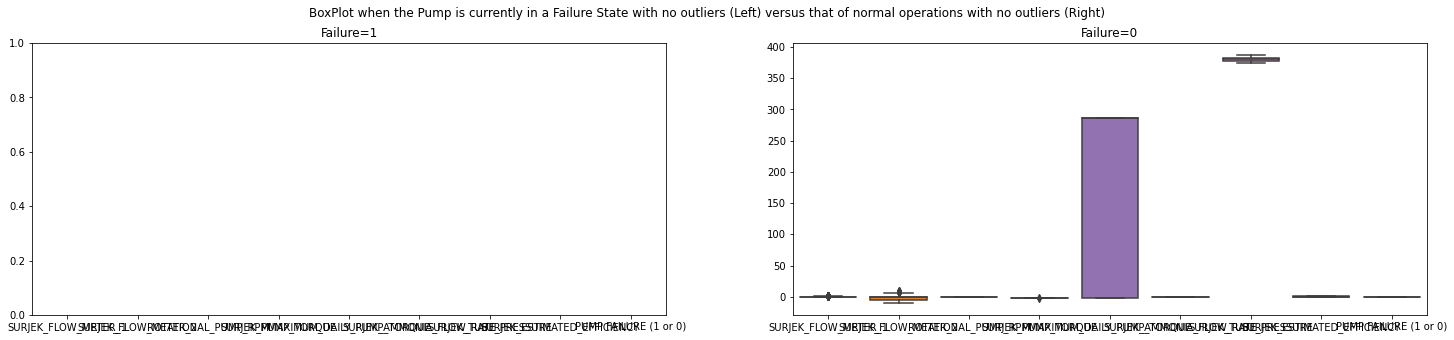

In [8]:
#Below is the first part of the code
f, axes = plt.subplots(1, 2, sharey=True)
f.suptitle("BoxPlot when the Pump is currently in a Failure State with no outliers (Left) versus that of normal operations with no outliers (Right)")
mpl.rcParams['figure.figsize'] = (15,5)
#---write your code below-------------

plt.subplot(1,2,1)
sns.boxplot(data=removed_outliers[removed_outliers['PUMP FAILURE (1 or 0)']==1]).set_title('Failure=1'),
plt.subplot(1,2,2)
sns.boxplot(data=removed_outliers[removed_outliers['PUMP FAILURE (1 or 0)']==0]).set_title('Failure=0')
plt.show()


### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span> 
We have provided a filtered column list for you.   

Using a loop, iterate through each of the Column Names and plot the data. (You can either make your X-axis the Timeframe variable or you can leave it blank and use the row numbers as an index). 

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time. 

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

## Please put your code here

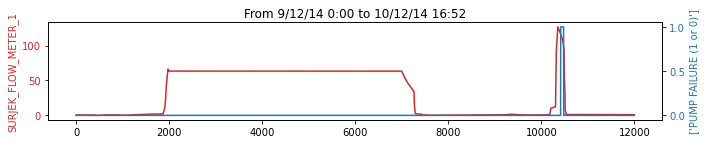

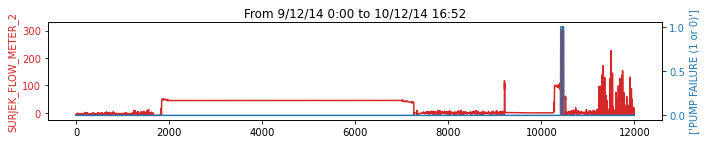

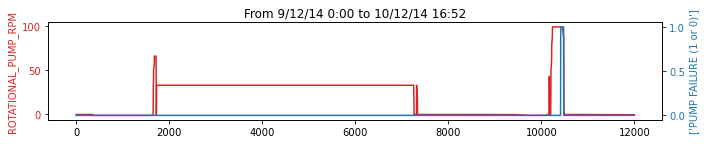

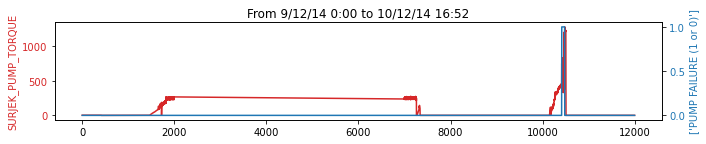

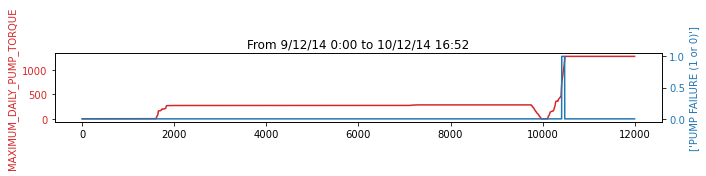

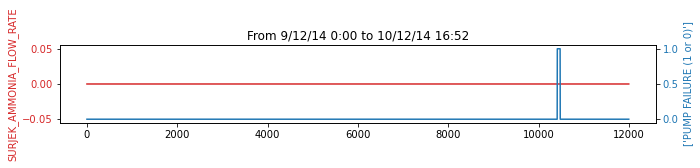

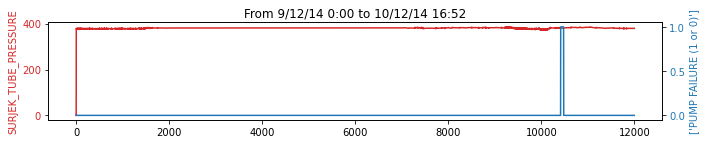

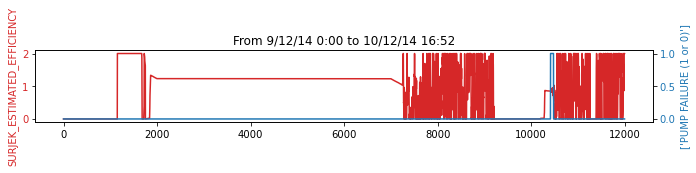

In [9]:
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = dataframe[filt].columns
mpl.rcParams['figure.figsize'] = (10,2)
#---write your code below-------
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3], ignore_index=True)
dataframe = dataframe.dropna()

for filt in colList:
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_ylabel(filt, color=color)
    ax1.plot(dataframe.loc[:,filt], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(filt2, color=color)
    ax2.plot(dataframe.loc[:,filt2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout() 
    plt.title('From 9/12/14 0:00 to 10/12/14 16:52')
    plt.show()





#---To Here------




Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”. 


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

## Please put your code here

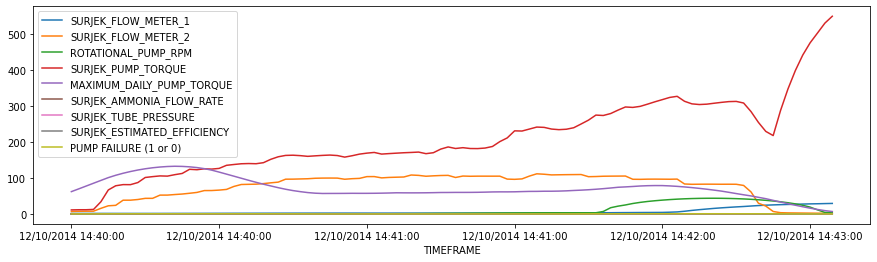

In [10]:
#Below is the first part of the code
from datetime import datetime
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3], ignore_index=True)
dataframe = dataframe.dropna()
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt2 = ['PUMP FAILURE (1 or 0)']
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
colList = dataframe[filt].columns
mpl.rcParams['figure.figsize'] = (15,4)
dataframe.set_index('TIMEFRAME', inplace=True)
#----write your code below-------

stdev = dataframe.rolling(30).std()
stdev = stdev.loc['12/10/2014 14:40:00': '12/10/2014 14:45:00']
stdev.plot()
plt.show()


#Loop through the Plot



---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

**Note:** We have provided the filter list and created the dataframe for you. 

Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Please put your code here

In [11]:
#Below is the first part of the code
from datetime import datetime
dataframe = pd.concat(combine)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
dataframe = dataframe[filt]
#----write your code below--------




NameError: name 'combine' is not defined

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

### Please put your code here

---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. This time, you'll transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out? If yes, list these out below your heatmap.

**Note:** We have provided the initial dataframe and filters.

## Please put your code here

In [ ]:
#Below is the first part of the code
dataframe = pd.concat(combine)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
#----write your code below------



### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time use the rolling standard deviation variables you created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

**Note:** We have provided the initial dataframe and filter list.

## Please put your code here 

In [ ]:
#Answer for step i): 
#Below is the first part of the code
dataframe_two = pd.concat(combine)
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']
#----write your code below------



In [ ]:
#answer for step ii): 
#Below is the first part of the code
dataframe_two = pd.concat(combine)
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']
#----write your code below------



Great job creating those regressive equations! You've reached the final step of this case study!
### Step 15: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this. Make the line widths wider than 1 so the plots are easier to see. We have provided the initial figure size.

## Please put your code here

In [ ]:
#Below is the first part of the code
mpl.rcParams['figure.figsize'] = (15,4)
#----write your code below------


#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")


You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

## Great job! Being able to complete this case study means that you're now fluent in Python for data analysis! Congratulations!